# Pitchfork
Pitchfork is een populaire website waarop reviews van veelal alternatieve muzikanten worden geplaatst.

- Hoe is het verloop in de tijd in de score voor de 100 meest gereviewde artiesten?
- Welke top 100 artiesten hebben het grootste verschil?
- Hoe verandert de gemiddelde score over de tijd?
- Worden eerste, tweede, derde, etc. albums beter beoordeeld?
- Hebben de meest gereviewde artiesten hogere scores dan minder gereviewde artiesten?
<br>
<br>

Zijn de reviews van Pitchfork eerlijk? Zijn er bepaalde factoren die een hogere score voorspellen?
- Zijn er bepaalde reviewers die hogere scores geven?
- Welke genres hebben de hoogste scores?
<br>
- Is het mogelijk voor deze factoren te compenseren?
<br>
- Hoe veranderen deze zelfde eigenschappen als we compenseren voor reviewer/label/genre?

## Database importeren

In [1]:
import pandas as pd
import sqlite3

con = sqlite3.connect('database.sqlite')
cur = con.cursor()

artist = []

for row in cur.execute('SELECT * FROM reviews'):
        artist.append(row)

df = pd.DataFrame(artist)

## Genres toevoegen

In [2]:
genres = []

for row in cur.execute('SELECT * FROM genres'):
        genres.append(row)

## Labels toevoegen

In [3]:
labels = []

for row in cur.execute('SELECT * FROM labels'):
        labels.append(row)

## Rename

In [4]:
df = df.rename(columns={0:'col',
                        1:'album',
                        2:'artist',
                        3:'url',
                        4:'score',
                        5:'drop_col',
                        6:'reviewer',
                        7:'drop_col',
                        8:'date',
                        9:'drop_col',
                        10:'drop_col',
                        11:'drop_col',
                        12:'year'})

df.drop(labels=['drop_col'], axis='columns', inplace=True)

## Genres toevoegen
Elk album wordt 1 genre toegewezen

In [5]:
genres_df = pd.DataFrame(genres, columns=['col','genre'])
genres_df.drop_duplicates(subset='col', inplace=True)
df = genres_df.merge(df, left_on = 'col', right_on ='col')

## Label toevoegen
Het label van elk album wordt toegevoegd

In [6]:
labels_df = pd.DataFrame(labels, columns=['col','label'])
labels_df.drop_duplicates(subset='col', inplace=True)
df = labels_df.merge(df, left_on = 'col', right_on ='col')

In [7]:
top_100 = df.groupby(['artist']).year.count().sort_values().tail(101).keys()[0:100]

## Aantal unieke artiesten


In [8]:
len(df.artist.unique())

8715

## Aantal unieke albums

In [9]:
len(df.album.unique())

17835

## Review score of the 5 most reviewed artists
De top 5 heeft over het algemeen scores die op z'n minst voldoende zijn

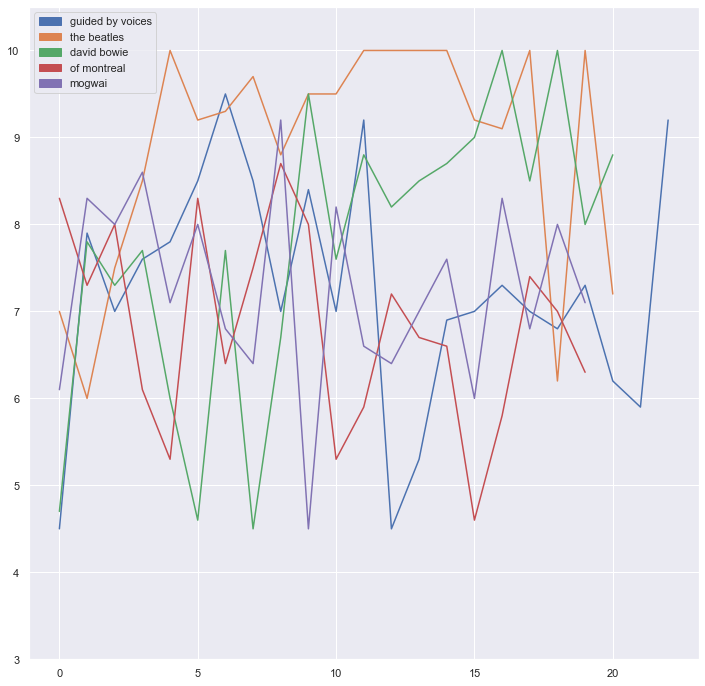

In [10]:
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib import pyplot as plt

def get_graph(number_of_artists):
    plt.figure(figsize=(12,12))
    legend_handles = []

    for n in top_100[::-1][0:number_of_artists]:
        current = df[df['artist'] == n].sort_values(by='date').reset_index() 
        current_line = plt.plot(current['score'])
        current_legend = mpatches.Patch(color=current_line[0].get_color(), label=n)
        legend_handles.append(current_legend)

    plt.ylim(3,10.5)
    plt.legend(handles=legend_handles)
    plt.show()
sns.set_theme()
get_graph(5)

## Percentage voldoende van top 5
De scores van deze top 5 zien er aardig goed uit, het grootste gedeelte lijkt in ieder geval een voldoende te halen. Om dit te kwantificeren reken ik hier uit hoeveel hiervan een 5.5 of hoger heeft gehaald.

In [11]:
top_5 = df[df['artist'].isin(top_100[::-1][0:5])]

percentage_voldoende = len(top_5[top_5['score'] >= 5.5]) / len(top_5)  * 100
print(f"Percentage voldoende is {round(percentage_voldoende,2)} %")

Percentage voldoende is 90.48 %


## Meer artiesten
De bovenstaande grafiek is redelijk voor een beperkt aantal artiesten, maar als er informatie over meer dan 5 moet worden gevonden, neemt het nut snel af, zoals hieronder te zien voor de top 10 artiesten, laat staan een nog groter aantal.

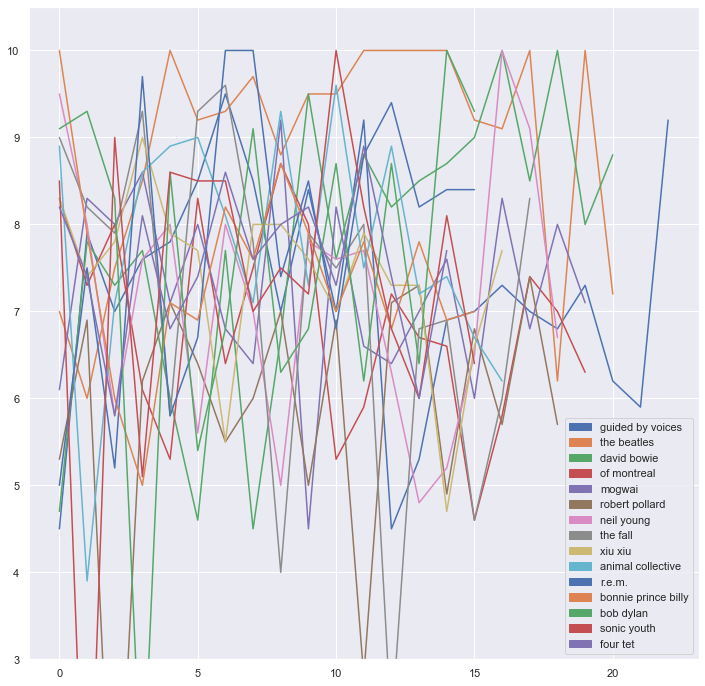

In [12]:
get_graph(15)

In [13]:
top_10_mean = df[df['artist'].isin(top_100[::-1][0:10])]

top_10_mean.groupby(['artist']).score.mean().sort_values(ascending=False)

artist
the beatles          8.890476
animal collective    7.747059
david bowie          7.742857
xiu xiu              7.394118
mogwai               7.250000
guided by voices     7.230435
the fall             7.172222
neil young           7.168421
of montreal          6.835000
robert pollard       5.789474
Name: score, dtype: float64

## Top 100 artists with the highest mean score
Welke 10 artiesten uit de top 100 hebben de hoogste gemiddeld score en welke de laagste?

In [14]:
df_top_100 = df[df['artist'].isin(top_100)]

df_top_100.groupby(['artist']).score.mean().sort_values(ascending=False).head(10)

artist
the beatles            8.890476
miles davis            8.730769
califone               8.318182
super furry animals    8.200000
tim hecker             8.066667
william basinski       8.054545
saint etienne          7.984615
mouse on mars          7.950000
radiohead              7.923077
swans                  7.920000
Name: score, dtype: float64

## Hoogste gemiddelde score
Van de 100 meest gereviewde artiesten hebben `The beatles` de hoogste gemiddelde score.

In [15]:
df_top_100.groupby(['artist']).score.mean().sort_values(ascending=False).tail(10)

artist
mm                 6.410000
trans am           6.320000
lil wayne          6.320000
atmosphere         6.316667
melvins            6.245455
why?               6.240000
nine inch nails    5.923077
ryan adams         5.866667
robert pollard     5.789474
coldplay           5.720000
Name: score, dtype: float64

## Artiest met laagste gemiddelde score
Van de 100 meest gereviewde artiesten heeft `Coldplay` de laagste gemiddelde score.

## Is er een verschil in score per jaar?


In [16]:
for year in df.year.unique():
    year_df = df[df['year'] == year]


In [17]:
df.groupby(['year']).score.median().reset_index().set_index('year')


,score
year,
1999,7.2
2000,7.2
2001,7.5
2002,7.2
2003,7.3
2004,7.5
2005,7.3
2006,7.2
2007,7.1


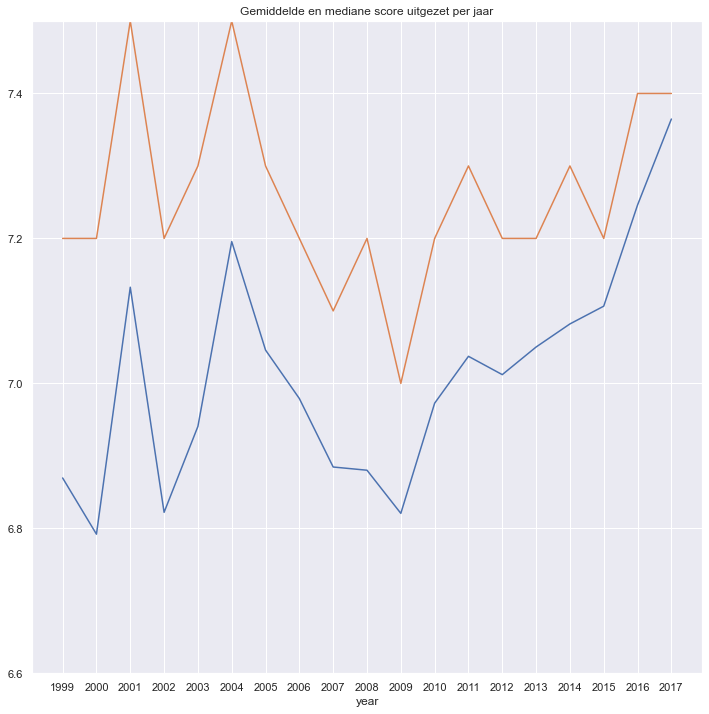

In [18]:
mean_by_year = df.groupby(['year']).score.mean()
median_by_year = df.groupby(['year']).score.median()


plt.figure(figsize=(12,12))
sns.lineplot(x = mean_by_year.index, y = mean_by_year.values)
sns.lineplot(x = median_by_year.index, y = median_by_year.values)
plt.title('Gemiddelde en mediane score uitgezet per jaar')
sns.set_theme
plt.xticks(mean_by_year.index)
plt.ylim(6.6,7.5)
plt.show()

<AxesSubplot:>

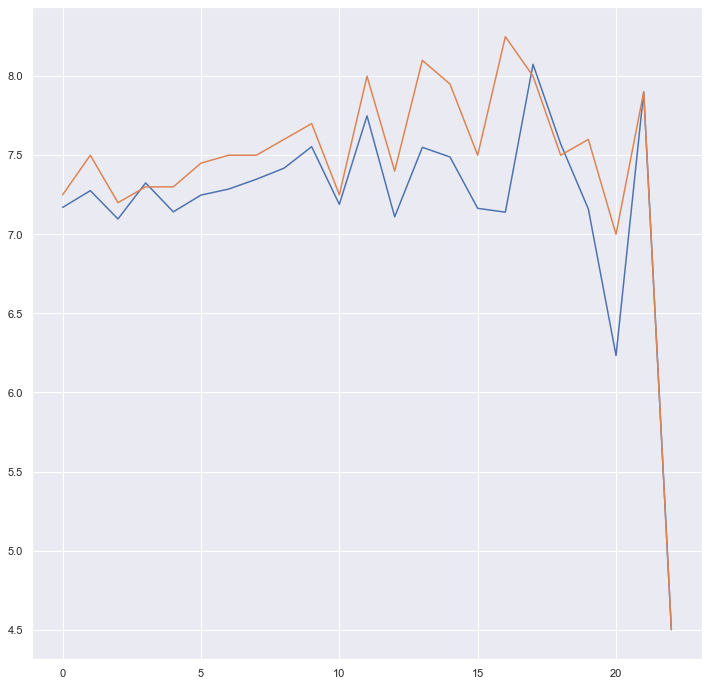

In [19]:
album_order_score = {}

for artist in top_100:
    artist_albums = df[df['artist'] == artist]
    album_order = {}
    
    for album_number, album in enumerate(artist_albums.index):
        if album_number not in album_order_score:
            album_order_score[album_number] = [artist_albums.iloc[album_number,list(artist_albums.columns).index('score')]]
        else:
            album_order_score[album_number].append(artist_albums.iloc[album_number,list(artist_albums.columns).index('score')])
            
album_order_score_df = pd.DataFrame.from_dict(album_order_score, orient='index').T

plt.figure(figsize=(12,12))
sns.lineplot(x = album_order_score_df.columns, y = album_order_score_df.mean())
sns.lineplot(x = album_order_score_df.columns, y = album_order_score_df.median())

## Zijn er reviewers die een hogere score geven?
Hoeveel reviewers zijn er?

In [20]:
len(df['reviewer'].unique())

432

## De 10 productiefste reviewers
Joe Tangari is degene die de meeste reviews post.

In [21]:
df.groupby(['reviewer']).album.count().sort_values(ascending=False).head(10)

reviewer
joe tangari           816
stephen m. deusner    725
ian cohen             699
brian howe            500
mark richardson       476
stuart berman         445
marc hogan            439
nate patrin           347
marc masters          312
jayson greene         299
Name: album, dtype: int64

In [22]:
top_100_reviewers = df.groupby(['reviewer']).album.count().sort_values(ascending=False).head(100)

In [23]:
reviewers_dict = {}

for n in top_100_reviewers.index:
    df_reviewer = df[df['reviewer'] == n]
    reviewers_dict[n] = {'mean' : df_reviewer.score.mean(),
                         'median' : df_reviewer.score.median(),
                         'review_quantity' : len(df_reviewer)}
reviewers_df = pd.DataFrame(reviewers_dict).T

In [24]:
reviewers_df.sort_values(by='mean', ascending=False)

,mean,median,review_quantity
jenn pelly,8.056098,8.0,41.0
seth colter walls,7.724138,7.9,58.0
scott plagenhoef,7.669106,7.8,123.0
alex linhardt,7.616667,7.7,42.0
mark richardson,7.578571,7.8,476.0
...,...,...,...
liz colville,6.343396,6.6,53.0
joshua love,6.342056,6.4,107.0
brent dicrescenzo,6.163441,6.9,93.0
adam moerder,6.151675,6.5,209.0


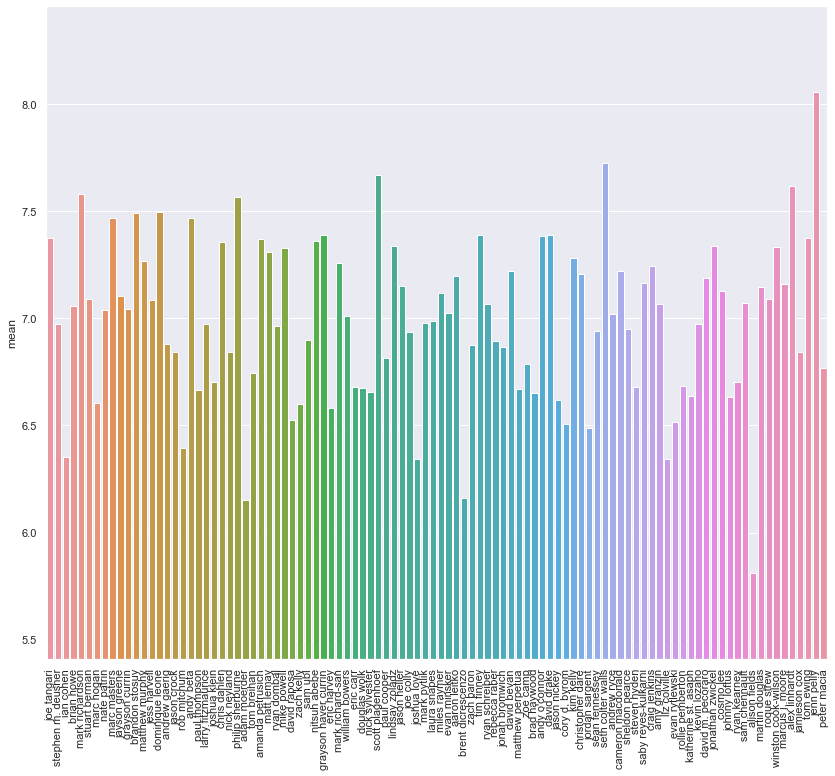

In [25]:
plt.figure(figsize=(14,12))
sns.barplot(x = reviewers_df.index, y = reviewers_df['mean'])
plt.xticks(rotation=90)
plt.ylim(reviewers_df['mean'].min()-0.4,reviewers_df['mean'].max()+0.4)
plt.show()

In [26]:
#sns.boxplot(x = df['reviewer'].value_counts().index[0:10], y = df['score'])

## Totale gemiddelde
Het totale gemiddelde is

In [27]:
df_score_mean = df.score.mean()
df_score_mean

7.005779372587397

## Verschil in gemiddelde score
Er is hier een duidelijk verschil te zien in gemiddelde score. Degene met de laagste scores is Alison Fields.

In [28]:
reviewers_df[reviewers_df['mean'] == reviewers_df['mean'].min()]

,mean,median,review_quantity
alison fields,5.81087,6.0,46.0


## Hoogste score
Degene met de hoogste score is Jenn Pelly.

In [29]:
reviewers_df[reviewers_df['mean'] == reviewers_df['mean'].max()]

,mean,median,review_quantity
jenn pelly,8.056098,8.0,41.0


## Verschil hoogste en laagste
Dit verschil tussen de hoogste en laagste gemiddelde score is ruim 2 punten, terwijl ze allebei een redelijke hoeveelheid reviewers hebben uitgevoerd! Dit suggereert dat de specifieke reviewer een belangrijke factor is bij het bepalen of een score betrouwbaar is.

In [30]:
reviewers_df[reviewers_df['mean'] == reviewers_df['mean'].max()]['mean'].values[0] - reviewers_df[reviewers_df['mean'] == reviewers_df['mean'].min()]['mean'].values[0]

2.245227995758219

## Oneerlijke scores
De reviewers van Pitchfork zijn ook maar mensen met elk hun eigen vooroordelen, misschien is het voor Pitchfork een mogelijkheid om op hun ingezonden score een algoritme toe te passen wat hun eigen bias in acht neemt.

## Genre verdeling
Er is ook per genre een verschil te zien. `Pop/R&B` scoort het laagste, terwijl `Experimental` het beste uit de bus komt. Het verschil tussen deze twee is ongeveer 0.6 punt.

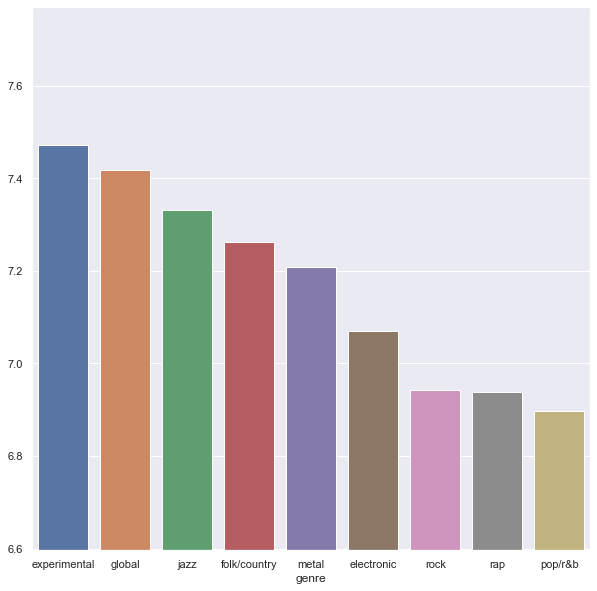

In [31]:
mean_by_genre = df.groupby(['genre']).score.mean().sort_values(ascending=False)

plt.figure(figsize=(10,10))
sns.barplot(x = mean_by_genre.index, y = mean_by_genre.values)
plt.ylim(mean_by_genre.values.min()-0.3,mean_by_genre.values.max()+0.3)
plt.show()

In [32]:
mean_by_genre

genre
experimental    7.470796
global          7.417391
jazz            7.331378
folk/country    7.262892
metal           7.208683
electronic      7.068907
rock            6.941829
rap             6.937970
pop/r&b         6.896228
Name: score, dtype: float64

## Label verdeling

In [33]:
top_100_labels = df.groupby(['label']).album.count().sort_values(ascending=False)[1:101]

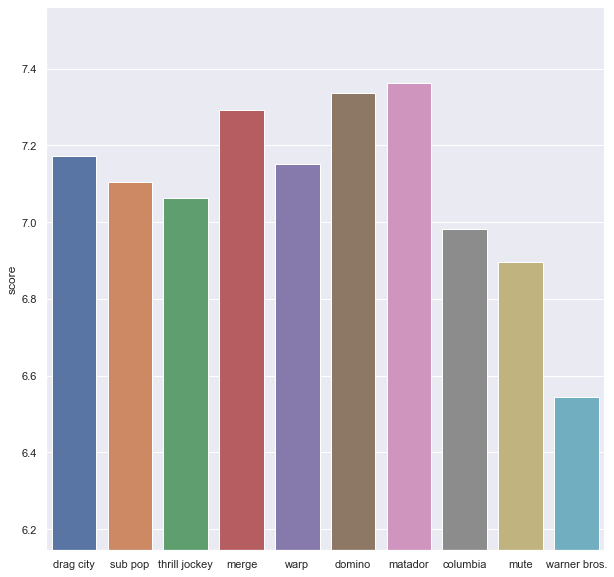

In [34]:
label_scores = {}

for n in top_100_labels.index[0:10]:
    label_scores[n] = (df[df['label']==n].score.mean())

label_scores_df = pd.DataFrame(label_scores, index=['score']).T

plt.figure(figsize=(10,10))
sns.barplot(x = label_scores_df.index, y = label_scores_df['score'])
plt.ylim(label_scores_df['score'].min()-0.4, label_scores_df['score'].max()+0.2)
plt.show()

<AxesSubplot:xlabel='label', ylabel='score'>

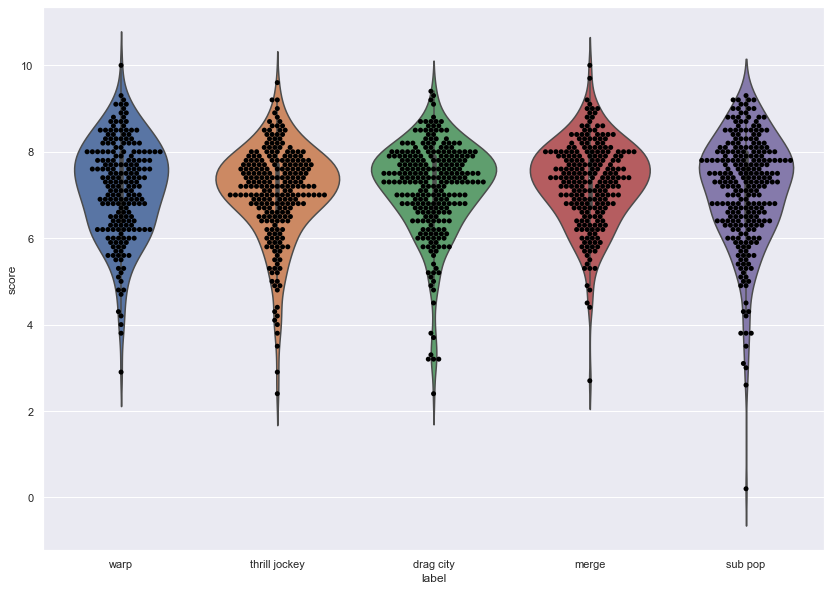

In [35]:
labels_df = pd.DataFrame(df[df['label'].isin(list(top_100_labels.index[0:5]))])

plt.figure(figsize=(14,10))
sns.violinplot(x=labels_df['label'], y = df['score'])
sns.swarmplot(data=labels_df, x= 'label', y = 'score', color = 'black')

In [36]:
labels_df = pd.DataFrame(df[df['label'].isin(list(top_100_labels.index[0:5]))])


In [37]:
labels_df['before_2010'] = labels_df['year'].apply(lambda x: 'yes' if (x < 2010) else 'no')

In [39]:
def create_dataframe(column, data):
    _dict = {}
    data[column].fillna('unknown')
    for n in data[column].unique():
        _df = data[data[column] == n]
        _dict[n] = {'mean' : _df.score.mean(),
                         'median' : _df.score.median(),
                         'review_quantity' : int(len(_df))}
    output_df = pd.DataFrame(_dict).T
    return output_df


reviewers_df_all = create_dataframe('reviewer', df)


genre_df_all  = create_dataframe('genre', df)


label_df_all = create_dataframe('label', df)

def score_adjustment(reviewer, genre, label):
    reviewer_adjustment = df_score_mean - reviewers_df_all.loc[reviewer,'mean']
    genre_adjustment = df_score_mean - genre_df_all.loc[genre, 'mean']
    label_adjustment = df_score_mean - label_df_all.loc[label, 'mean']
    return reviewer_adjustment + genre_adjustment + label_adjustment

df['adjustment'] = df.apply(lambda x: score_adjustment(x['reviewer'], x['genre'], x['label']), axis=1)
df['adjusted_score'] = df['score'] + df['adjustment']

## Gemiddelde is gelijk gebleven
Doordat er voor elk album dezelfde correctie wordt uitgevoerd, blijft het gemiddelde gelijk (zolang we afronden op maximaal 14 cijfers)

In [40]:
round(df.adjusted_score.mean(),14) == round(df.score.mean(), 14)

False

## Andere top 10
Door deze correctie ziet de top 10 er behoorlijk anders uit

In [41]:
top_10_mean = df[df['artist'].isin(top_100[::-1][0:10])]
top_10_mean.groupby(['artist']).adjusted_score.mean().sort_values(ascending=False)

artist
the beatles          8.025200
david bowie          7.941242
guided by voices     7.585274
of montreal          7.536061
neil young           7.388556
xiu xiu              7.295141
mogwai               7.085659
animal collective    7.070278
the fall             7.027646
robert pollard       6.694148
Name: adjusted_score, dtype: float64

## Winnaars
De 10 artiesten die in totaal het meeste baat hebben gehad bij deze correctie, en dus eigenlijk in eerste instantie het oneerlijkst zijn beoordeeld, zijn deze:

In [42]:
df.groupby(['artist']).adjustment.sum().sort_values(ascending=False).head(10)

artist
robert pollard                 17.188820
black rebel motorcycle club    14.245047
of montreal                    14.021214
ghostland observatory          12.216201
the get up kids                12.139866
ryan adams                     11.829973
eels                           11.729377
ben folds five                 11.418646
nine inch nails                10.929119
hot hot heat                   10.346039
Name: adjustment, dtype: float64

## Verliezers
Terwijl deze 10 artiesten juist het mildst zijn beoordeeld en dus eigenlijk lager verdienen.

In [43]:
df.groupby(['artist']).adjustment.sum().sort_values(ascending=False)[-11:-1,]

artist
animal collective     -11.505269
bonnie prince billy   -11.912137
jhann jhannsson       -12.072559
john zorn             -12.289497
james brown           -12.350992
william basinski      -12.868307
fennesz               -14.119206
miles davis           -14.178350
arthur russell        -14.533988
tim hecker            -14.555098
Name: adjustment, dtype: float64

## Distributie is genormaliseerd
Zoals te zien in de onderstaande grafieken heeft de correctie tot gevolg gehad dat de distributie van de getallen dichter rond het gemiddelde is komen te liggen. Het heeft nogal wat weg van een normale verdeling.

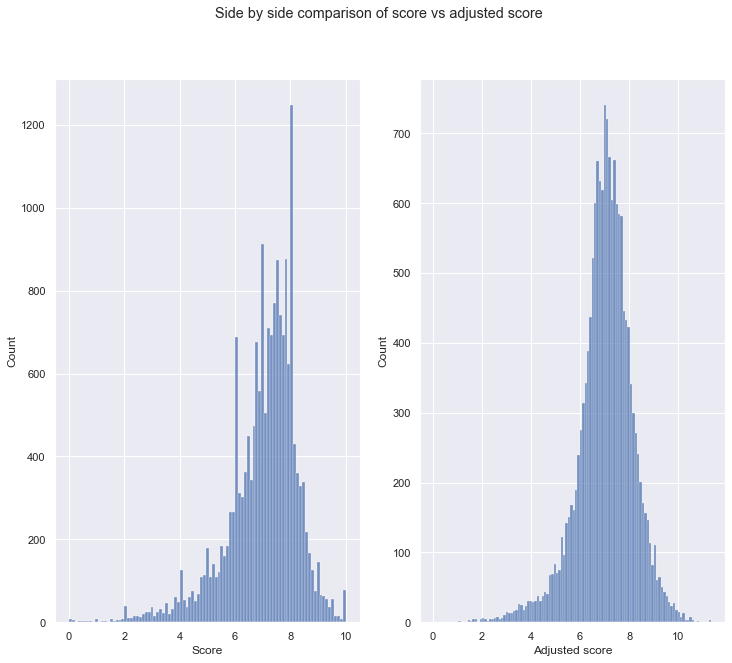

In [44]:
fig, axes = plt.subplots(1, 2)
fig.set_figheight(10)
fig.set_figwidth(12)
fig.suptitle('Side by side comparison of score vs adjusted score')

sns.histplot(ax=axes[0], data = df, x="score").set(xlabel='Score')
sns.histplot(ax=axes[1], data = df, x="adjusted_score" ).set(xlabel='Adjusted score')
#plt.axvline(x = 7, color = 'b', label = 'axvline - full height')
plt.show()

fig, axes = plt.subplots(1, 2)
fig.set_figheight(10)
fig.set_figwidth(12)
sns.violinplot(ax = axes[0], y = df['score'], hue = df['adjusted_score'], split=True)
#sns.violinplot(ax = axes[1], y = df['adjusted_score'])

In [45]:
df['score'].describe()

count    18393.000000
mean         7.005779
std          1.293675
min          0.000000
25%          6.400000
50%          7.200000
75%          7.800000
max         10.000000
Name: score, dtype: float64

In [46]:
df['adjusted_score'].describe()

count    15989.000000
mean         7.028537
std          1.139745
min          0.059858
25%          6.479631
50%          7.088970
75%          7.712652
max         11.324587
Name: adjusted_score, dtype: float64

<AxesSubplot:xlabel='label', ylabel='score'>

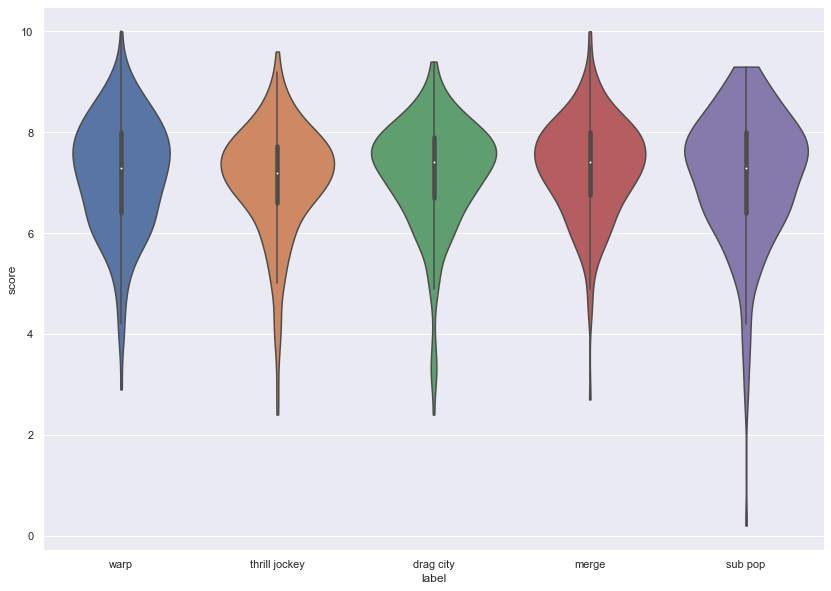

In [47]:
plt.figure(figsize=(14,10))
sns.violinplot(x=labels_df['label'], y = df['score'], cut=0, scale='count')
#sns.swarmplot(data=labels_df, x= 'label', y = 'adjusted_score', color = 'black')

labels_df = pd.DataFrame(labels, columns=['col','label'])
labels_df.drop_duplicates(subset='col', inplace=True)
df = labels_df.merge(df, left_on = 'col', right_on ='col')